In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "data/BLAR_implementation/Block_0304/forecasted_counts/"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
6370/910

7.0

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 459 ms, sys: 12.9 ms, total: 471 ms
Wall time: 474 ms


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,-0.003918,0.0,-0.006743,0.0,-0.005412,0.00000,-0.005279,0.098687,0.019572,...,0.0,-0.000748,0.0,-0.001173,0.0,-0.019170,0.0,-0.008012,0.0,-0.013050
1,0.0,0.000806,0.0,0.000342,0.0,-0.003876,0.00000,-0.001987,0.000280,0.065125,...,0.0,0.002310,0.0,-0.002744,0.0,-0.016716,0.0,-0.009038,0.0,-0.017697
2,0.0,-0.000525,0.0,-0.007092,0.0,-0.006806,0.00000,-0.010131,0.017957,0.027200,...,0.0,-0.004447,0.0,-0.001238,0.0,-0.021435,0.0,-0.009584,0.0,-0.015251
3,0.0,-0.001494,0.0,0.001550,0.0,-0.006382,0.00000,-0.003422,0.000000,0.011647,...,0.0,0.008786,0.0,-0.000404,0.0,-0.028629,0.0,-0.006577,0.0,-0.010325
4,0.0,-0.004485,0.0,0.000729,0.0,-0.004547,0.00025,0.001520,0.052774,0.051450,...,0.0,0.003943,0.0,-0.001827,0.0,-0.012863,0.0,0.001267,0.0,-0.000991


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.00000,0.098687,0.439687,0.00000,0.0,0.0,0.0,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.00000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.00000,0.000280,0.191231,0.00028,0.0,0.0,0.0,...,0.000000e+00,0.000000,0.000000,2.406495e-01,0.41786,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.00000,0.017957,0.092096,0.00000,0.0,0.0,0.0,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.00000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,4.513563e-07,0.033814,0.001271,0.000000e+00,0.00000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.00025,0.052774,0.000018,0.00000,0.0,0.0,0.0,...,0.000000e+00,0.000020,0.002492,3.902047e-07,0.00000,0.0,0.0,0.0,0.0,0.0


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.000000e+00,0.103721,0.552221,0.00000,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000e+00,0.000280,0.210739,0.00028,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000,2.720751e-01,0.518708,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000e+00,0.018119,0.096470,0.00000,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,4.513564e-07,3.439246e-02,0.001272,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,2.504417e-04,0.054191,0.000018,0.00000,0.0,0.0,0.0,...,0.000000e+00,2.038446e-05,0.002495,3.902048e-07,0.000000,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,2.405033e-08,0.000154,0.000001,0.00000,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.000000e+00,8.526243e-09,0.000650,2.402814e-05,0.000000,0.0,0.0,0.0,0.0,0.0


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    37.000000
1    41.002058
2    42.999998
3    41.999955
4    37.999999
5    34.000000
6    24.000000
dtype: float64

In [26]:
%%time
catch_all_averaged_preds = []
for i in range(910):
    file_name = "all_forecasts_sub_" + str(i) + '.npy'
    al_forecasts_npy_file = np.load(os.path.join(path_to_dfs, file_name))
    # make the conversion
    sub_window_forecasts = np.exp(al_forecasts_npy_file) - 1
    # get rid of anything below zero?
    # sub_window_forecasts[sub_window_forecasts < 0] = 0
    # get averages over time 
    sub_window_forecasts_averaged = np.mean(sub_window_forecasts, axis = (0,1))
    catch_all_averaged_preds.append(sub_window_forecasts_averaged)    

CPU times: user 148 ms, sys: 39.2 ms, total: 187 ms
Wall time: 187 ms


In [27]:
len(catch_all_averaged_preds)

910

In [28]:
catch_all_averaged_preds[0]

array([-0.00384966,  0.00086555, -0.00041916, -0.00144073, -0.0044309 ,
        0.0046703 ,  0.001731  ], dtype=float32)

In [29]:
# make this a dataframe

In [30]:
Forecasted_values_df = pd.DataFrame(catch_all_averaged_preds).T

In [31]:
Forecasted_values_df.shape

(7, 910)

In [32]:
sum_forecasted_values = Forecasted_values_df.sum(axis = 1)

In [33]:
sum_forecasted_values

0    34.559814
1    29.791454
2    31.971151
3    81.211182
4    42.480869
5    43.273811
6    96.250122
dtype: float32

In [34]:
# These results are absurd, let's stick to what we had done before, we can justify that, this is what we did for comps as well

In [35]:
# concatenate the sum dataframes
block_0304_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0304_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0304_true_and_forecasted_values_df

,True_count,Forecasted_count
0,37.000000,34.559814
1,41.002058,29.791454
2,42.999998,31.971151
3,41.999955,81.211182
4,37.999999,42.480869
5,34.000000,43.273811
6,24.000000,96.250122


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

31.88584506143265

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

21.413666571813785

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=-0.6013166243744443, pvalue=0.15323496250387333)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-26.79884905343238

##### Coverages and widths for the forecasted values?

In [42]:
# for this we need the all_forecasts npy files

In [43]:
# content location is the same path as above

In [44]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [45]:
# all_forecasts_npy_files

In [46]:
# load the npy files

In [47]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.mean(np.exp(load_file)-1, axis = 1)
    loaded_npy_files.append(mean_file)

CPU times: user 232 ms, sys: 60.4 ms, total: 292 ms
Wall time: 293 ms


In [48]:
len(loaded_npy_files)

910

In [49]:
loaded_npy_files[0].shape

(1000, 7)

In [50]:
loaded_npy_files[0]

array([[-0.00818793,  0.00254583, -0.00758116, ..., -0.00503683,
         0.00381254,  0.00656281],
       [-0.00436237,  0.00149675, -0.00648668, ..., -0.00286336,
         0.0047089 ,  0.00445822],
       [-0.00559154,  0.00118388, -0.00723249, ..., -0.00419191,
         0.00422026,  0.00573377],
       ...,
       [ 0.00517912,  0.00079525,  0.00435935, ..., -0.00471595,
         0.01131272,  0.00199969],
       [ 0.00051762,  0.00470848,  0.00452435, ..., -0.00612253,
         0.00778249,  0.00156815],
       [ 0.00475964,  0.00368106,  0.00146855, ..., -0.00418089,
         0.0130848 ,  0.0015907 ]], dtype=float32)

In [51]:
# %%time
# # convert less than 0 entries to 0 for all arrays
# for arr in loaded_npy_files:
#     arr[arr < 0] = 0

In [52]:
loaded_npy_files[0]

array([[-0.00818793,  0.00254583, -0.00758116, ..., -0.00503683,
         0.00381254,  0.00656281],
       [-0.00436237,  0.00149675, -0.00648668, ..., -0.00286336,
         0.0047089 ,  0.00445822],
       [-0.00559154,  0.00118388, -0.00723249, ..., -0.00419191,
         0.00422026,  0.00573377],
       ...,
       [ 0.00517912,  0.00079525,  0.00435935, ..., -0.00471595,
         0.01131272,  0.00199969],
       [ 0.00051762,  0.00470848,  0.00452435, ..., -0.00612253,
         0.00778249,  0.00156815],
       [ 0.00475964,  0.00368106,  0.00146855, ..., -0.00418089,
         0.0130848 ,  0.0015907 ]], dtype=float32)

In [53]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [54]:
output.shape

(1000, 7)

In [55]:
output

array([[ 46.99799 ,  38.36623 ,  38.332787, ...,  49.539356,  47.005672,
         82.18004 ],
       [ 35.47528 ,  30.394686,  36.358845, ...,  27.120441,  39.004807,
         43.895763],
       [ 39.059593,  35.930233,  35.762463, ...,  33.488197,  40.236904,
         41.71497 ],
       ...,
       [ 35.64099 ,  36.823425,  37.148983, ...,  50.85902 ,  51.493366,
         71.32134 ],
       [ 51.039078,  34.7016  ,  52.261986, ..., 104.93632 ,  98.151276,
        215.93785 ],
       [ 32.36491 ,  40.621418,  51.8048  , ...,  51.327793,  51.74277 ,
         54.561153]], dtype=float32)

In [56]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [57]:
output_alt.shape

(1000, 7)

In [58]:
output_alt

array([[ 46.99799 ,  38.36623 ,  38.332787, ...,  49.539356,  47.005672,
         82.18004 ],
       [ 35.47528 ,  30.394686,  36.358845, ...,  27.120441,  39.004807,
         43.895763],
       [ 39.059593,  35.930233,  35.762463, ...,  33.488197,  40.236904,
         41.71497 ],
       ...,
       [ 35.64099 ,  36.823425,  37.148983, ...,  50.85902 ,  51.493366,
         71.32134 ],
       [ 51.039078,  34.7016  ,  52.261986, ..., 104.93632 ,  98.151276,
        215.93785 ],
       [ 32.36491 ,  40.621418,  51.8048  , ...,  51.327793,  51.74277 ,
         54.561153]], dtype=float32)

In [59]:
np.mean(output_alt == output)

1.0

In [60]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [61]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [62]:
li_train

array([[17.26994066],
       [17.58027539],
       [17.33627105],
       [19.24347196],
       [15.43692746],
       [21.82352796],
       [21.79909892]])

In [63]:
ui_train

array([[ 59.55552797],
       [ 41.84689865],
       [ 47.19564457],
       [212.6830368 ],
       [101.3143158 ],
       [ 80.12369843],
       [260.5935051 ]])

In [64]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [65]:
avg_width_train

96.11758770261484

In [66]:
y_traina = block_0304_true_and_forecasted_values_df[["True_count"]].values

In [67]:
y_traina

array([[37.00000004],
       [41.00205788],
       [42.99999831],
       [41.99995472],
       [37.99999945],
       [34.00000014],
       [24.00000014]])

In [68]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [69]:
coverage_train

1.0

In [70]:
np.mean(output, axis = 0)

array([34.559826, 29.791437, 31.971123, 81.21122 , 42.48093 , 43.273808,
       96.25012 ], dtype=float32)

In [71]:
sum_forecasted_values

0    34.559814
1    29.791454
2    31.971151
3    81.211182
4    42.480869
5    43.273811
6    96.250122
dtype: float32

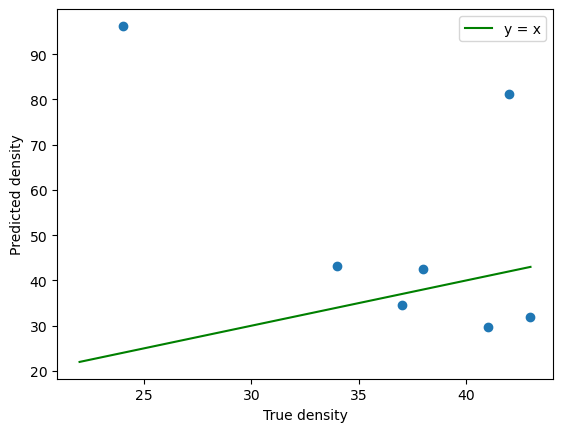

In [72]:
plt.scatter(block_0304_true_and_forecasted_values_df['True_count'], block_0304_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([22, 43], [22, 43], color='green', label='y = x')
plt.legend()
plt.show()

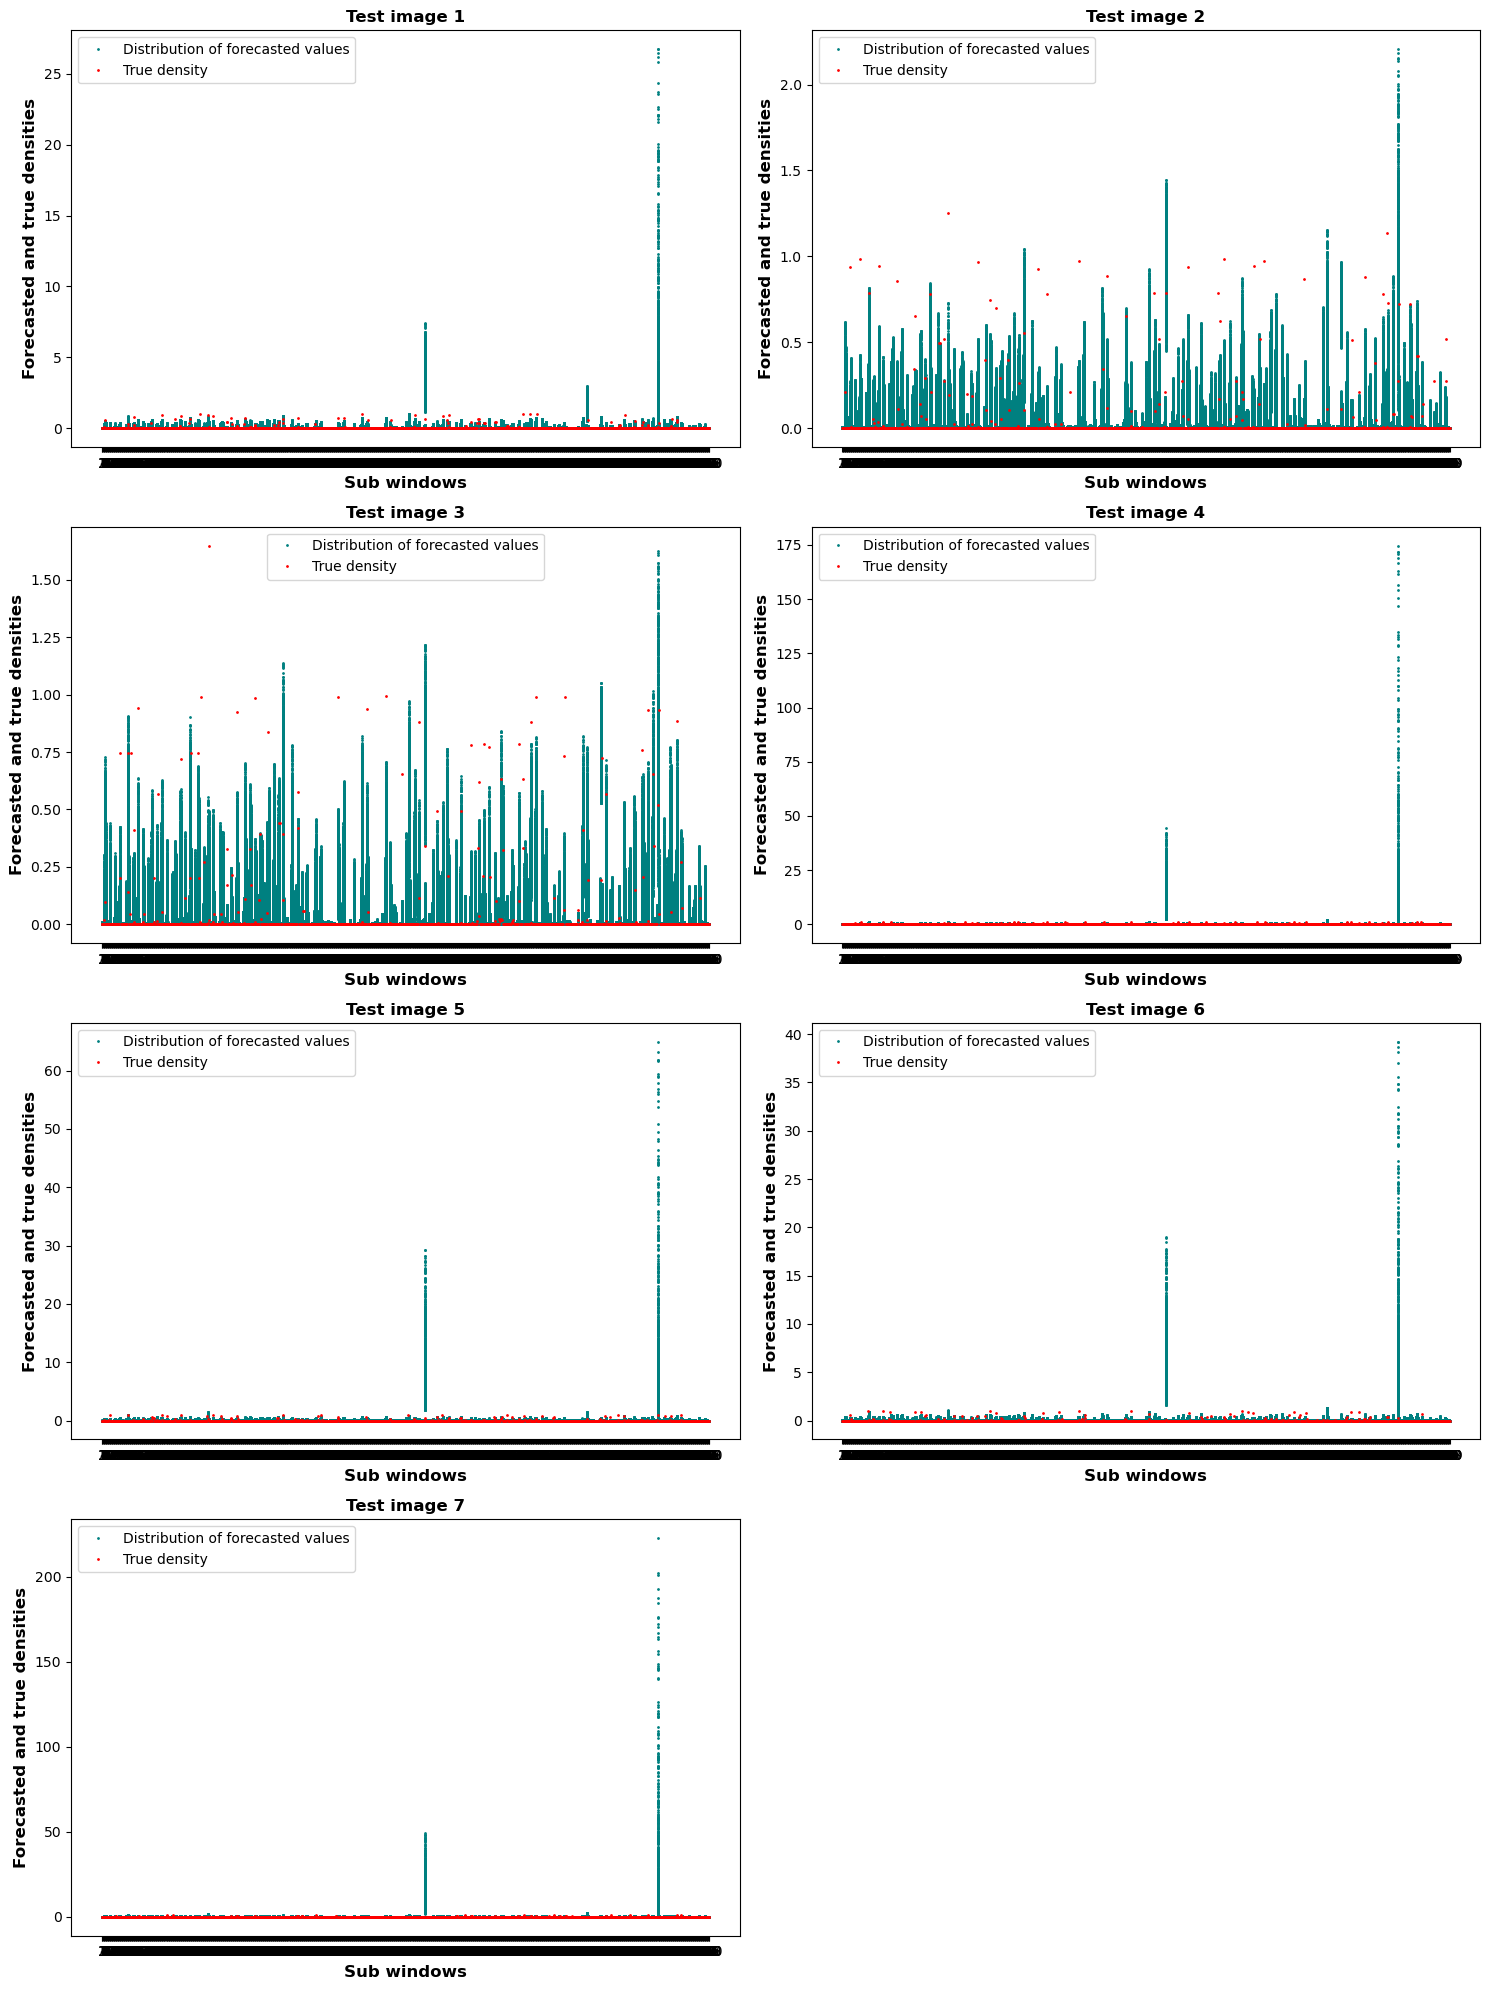

CPU times: user 29.1 s, sys: 839 ms, total: 29.9 s
Wall time: 29.6 s


In [73]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [74]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots

In [75]:
# we may need to re-think about the way the average forecasts were computed. Maybe get the average after exponentiating than averaging all values to a single value and then exponentiating? this would be a few lines of codes - but may be a better way to get the forecated density values? 